In [73]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [77]:
aggregrate_rock_data = pd.read_excel(r'C:\Users\charu\Downloads\aggregateRockData.xlsx',header=None)
category_number_df = aggregrate_rock_data[[1]].rename(columns={1: 'Category number'}).head(480)

In [79]:
feature_presence = pd.read_csv(r'C:\Users\charu\Downloads\feature_presence540.txt',delim_whitespace=True,header = None)
feature_presence_df = feature_presence.iloc[:480, 2:14]
column_name = ['Token number','Angular fragments','Rounded fragments','Straight stripes','Curved stripes','Physical layers','Veins','Oily/shimmery texture',
              'Splotchy texture', 'Single translucent crystal','Multiple cubic crystals','Sandy texture']
feature_presence_df.columns=column_name
feature_presence_df.head(5)

,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [81]:
#Concats the feature presence and aggregrate rock
rock_df = pd.concat([feature_presence_df, category_number_df], axis=1)
rock_df.head()

rock_df_data = pd.concat([feature_presence_df, category_number_df], axis=1)

**1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [7]:
rock_df.describe()

,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Category number
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854,2.000000
std,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149,0.817348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,2.000000
75%,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000,3.000000
max,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000,3.000000


* Curved Stripes:
      - Has a mean of 0.0423, indicating that most of the values in the curved strips are 0.
      - It has a maximum value of 1.
      - Standard Deviation (std): 0.161, indicating a low variance, with most values close to 0.
  
* Physical Layers:
      - Has a mean of 0.1651, which was more than the Curved Stripes.
      - Std: 0.217, showing moderate variation.
      - Max: 0.95, so the highest value doesn't reach 1, implying physical layers are observed to a significant but not maximal extent.

* Veins:
      - Mean: 0.0524, indicating veins are rare in most rocks.
      - Std: 0.103, showing low variability.
      - Max: 0.9, meaning some rocks have a high concentration of veins, though most values are close to 0.

* Oily/Shimmery Texture:
      - Mean: 0.1445, indicating this texture is moderately present.
      - Std: 0.266, suggesting higher variability compared to previous attributes.
      - Max: 1.0, meaning some rocks have a very high presence of this texture.

* Splotchy Texture:
      - Mean: 0.1415, with a similar moderate presence to oily texture.
      - Std: 0.168, showing moderate variance.
      - Max: 0.95, with some rocks having high values but not maximal.

* Single Translucent Crystal:
      - Mean: 0.0317, indicating a very low presence.
      - Std: 0.136, meaning this attribute is mostly close to 0.
      - Max: 1.0, showing that some rocks have this feature strongly present.
      
* Multiple Cubic Crystals:
     - Mean: 0.0251, suggesting this attribute is very rare.
     - Std: 0.112, with low variability.
     - Max: 1.0, so some rocks do have multiple cubic crystals prominently.
     
* Sandy Texture:
    - Mean: 0.1199, moderately present across rocks.
    - Std: 0.173, with a reasonable range of values.
    - Max: 1.0, indicating some rocks have a full sandy texture.
    
* Category Number:
    - Mean: 2 which indicates that the data is evenly spread across three classes.
    - Std: 0.817, indicating that the categories are relatively balanced.


In [9]:
rock_df = rock_df.apply(pd.to_numeric, errors='coerce')

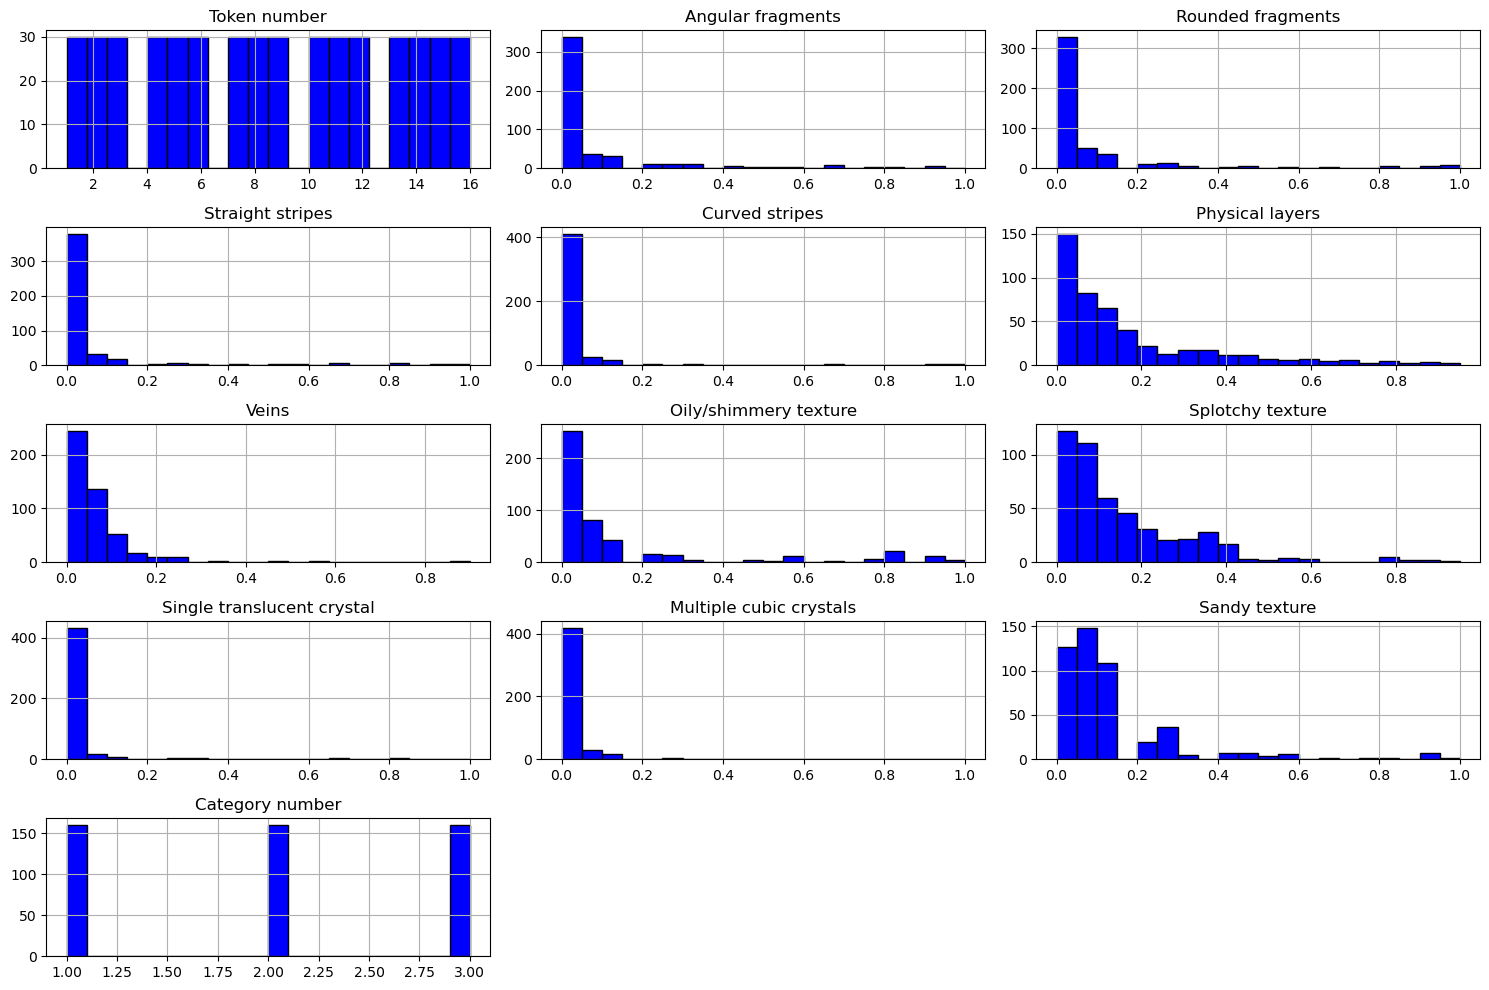

In [10]:
num_columns = len(rock_df.columns)
num_rows = (num_columns // 3) + 1

# Plot histograms for each numeric attribute
rock_df.hist(bins=20, figsize=(15, 10), layout=(num_rows, 3), color='blue', edgecolor='black')

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


Right-Skewed Distributions:
Curved stripes, Veins, Oily/shimmery texture, Single translucent crystal, and Multiple cubic crystals all exhibit right-skewed distributions.
Most of the values are concentrated around 0, with a long tail extending towards the higher values.

More Evenly Distributed Attributes:
Physical layers, Splotchy texture, and Sandy texture show somewhat more gradual distributions compared to the other attributes, but they still exhibit skewness. For example, Splotchy texture and Sandy texture have values spread out between 0 and 0.4, but they are still right-skewed.

Attribuites requiring special treatment:
Curved stripes, Veins, Oily/shimmery texture, Single translucent crystal, Multiple cubic crystals, Physical layers, Splotchy texture, and Sandy texture all are skewed towards right which requires special treatment. Logrithmic transformation can be applied to these as this compresses the range of large values, bringing them closer to the smaller ones.
For example, in the attribute Veins, where many values are near zero and a few are very large, a log transformation will reduce the impact of those extreme values and balance the distribution.


Index(['Token number', 'Angular fragments', 'Rounded fragments',
       'Straight stripes', 'Curved stripes', 'Physical layers', 'Veins',
       'Oily/shimmery texture', 'Splotchy texture',
       'Single translucent crystal', 'Multiple cubic crystals',
       'Sandy texture', 'Category number'],
      dtype='object')
   Angular fragments  Rounded fragments  Straight stripes  Curved stripes  \
0           0.182322           0.139762               0.0             0.0   
1           0.500775           0.139762               0.0             0.0   
2           0.470004           0.000000               0.0             0.0   
3           0.095310           0.615186               0.0             0.0   
4           0.300105           0.587787               0.0             0.0   

   Physical layers    Veins  Oily/shimmery texture  Splotchy texture  \
0          0.00000  0.04879                    0.0          0.262364   
1          0.04879  0.00000                    0.0          0.095310   
2

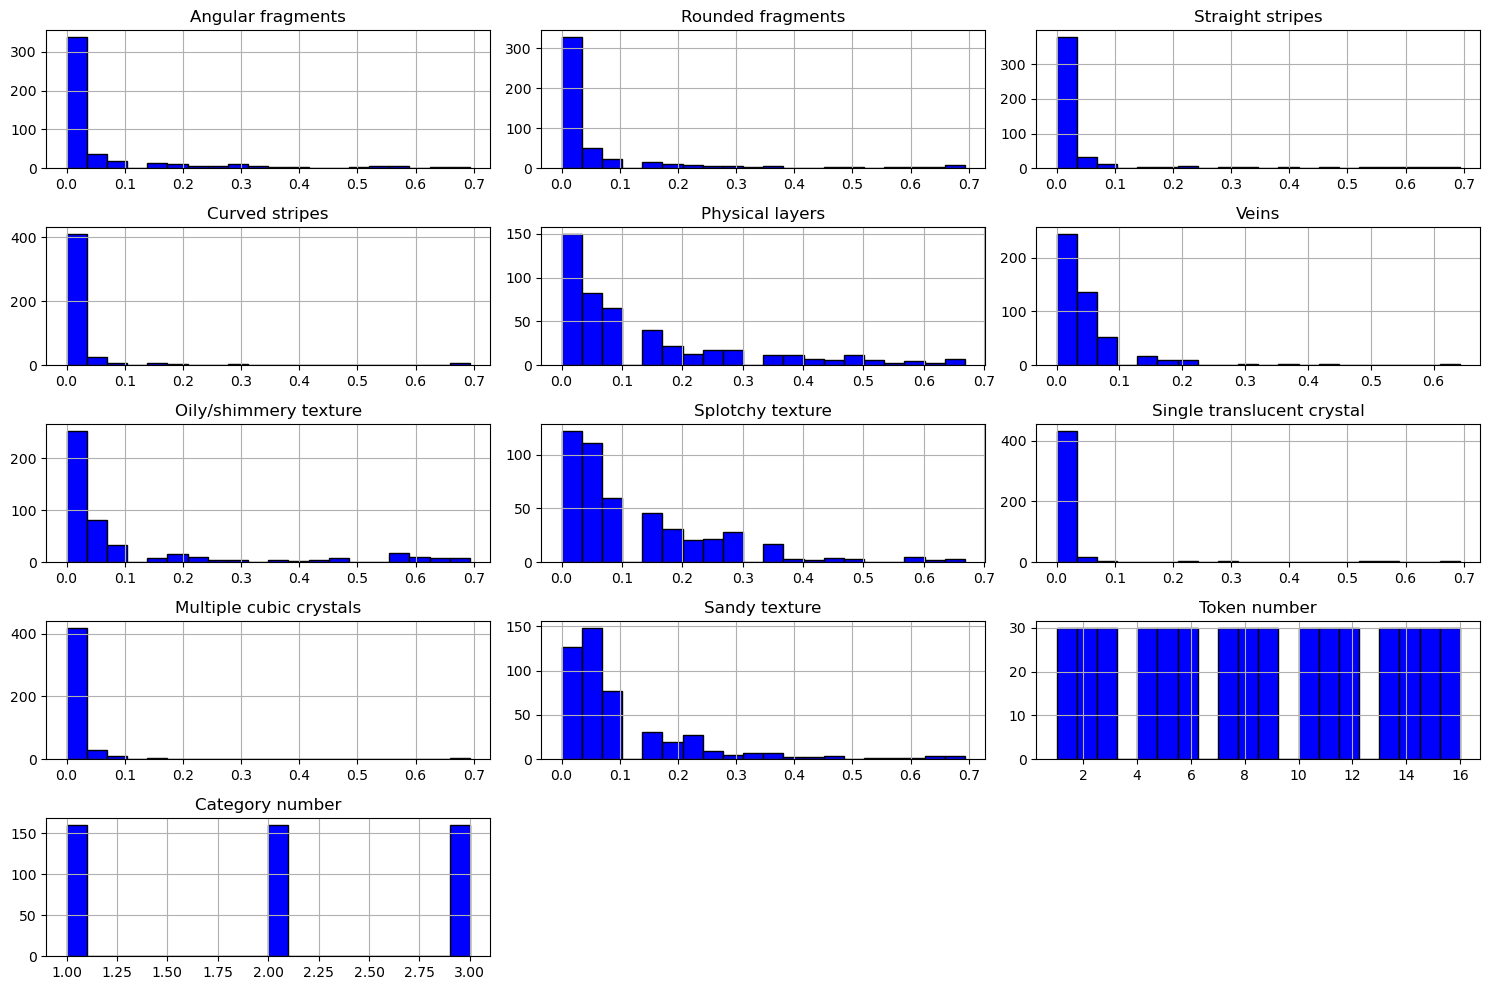

In [12]:
import numpy as np
import pandas as pd

# Check the column names to see the exact names of 'Token number' and 'Category number'
print(rock_df.columns)

# After inspecting the columns, use the correct names in the drop method
# For example, if there are spaces or different cases in the column names, adjust accordingly
columns_to_transform = rock_df.select_dtypes(include=[np.number])

# If 'Token number' and 'Category number' exist, drop them. Otherwise, drop based on the correct names.
if 'Token number' in columns_to_transform.columns:
    columns_to_transform = columns_to_transform.drop(columns=['Token number'])

if 'Category number' in columns_to_transform.columns:
    columns_to_transform = columns_to_transform.drop(columns=['Category number'])

# Apply logarithmic transformation (log1p to handle zero values) to the selected columns
log_transformed_data = columns_to_transform.apply(lambda x: np.log1p(x))

# Add back the 'Token number' and 'Category number' columns to the transformed data (if they exist in the original)
if 'Token number' in rock_df.columns:
    log_transformed_data['Token number'] = rock_df['Token number']

if 'Category number' in rock_df.columns:
    log_transformed_data['Category number'] = rock_df['Category number']

# Display the transformed data
print(log_transformed_data.head())

# Generate histograms for all numeric columns after logarithmic transformation
num_columns = len(log_transformed_data.columns)
num_rows = (num_columns // 3) + 1  # Organize layout into rows and columns for histograms

# Plot histograms for each transformed numeric attribute
log_transformed_data.hist(bins=20, figsize=(15, 10), layout=(num_rows, 3), color='blue', edgecolor='black')

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


**2.Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

Pearson Correlation Coefficient Matrix:
                            Angular fragments  Rounded fragments  \
Angular fragments                    1.000000           0.322301   
Rounded fragments                    0.322301           1.000000   
Straight stripes                    -0.145704          -0.138292   
Curved stripes                      -0.114815          -0.091749   
Physical layers                     -0.247474          -0.267026   
Veins                               -0.139829          -0.164872   
Oily/shimmery texture               -0.153153          -0.150747   
Splotchy texture                     0.110554           0.048664   
Single translucent crystal          -0.094687          -0.104989   
Multiple cubic crystals             -0.004328          -0.035588   
Sandy texture                       -0.180440          -0.147915   
Token number                         0.008373          -0.000998   
Category number                     -0.153128          -0.015645   

       

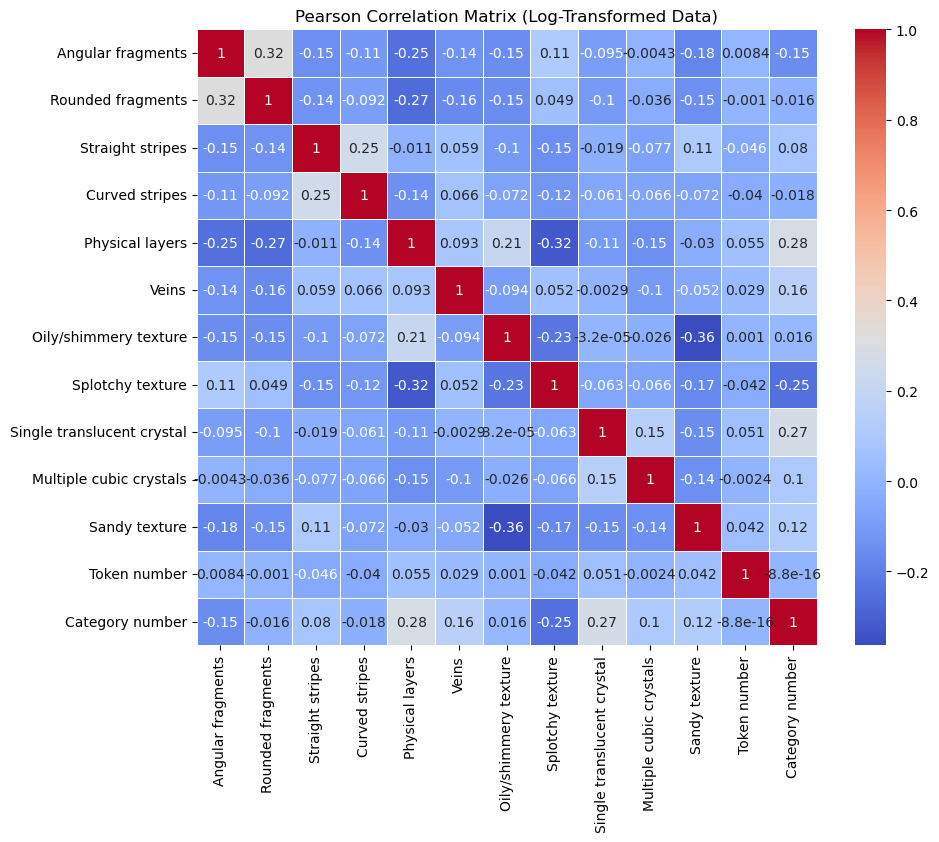

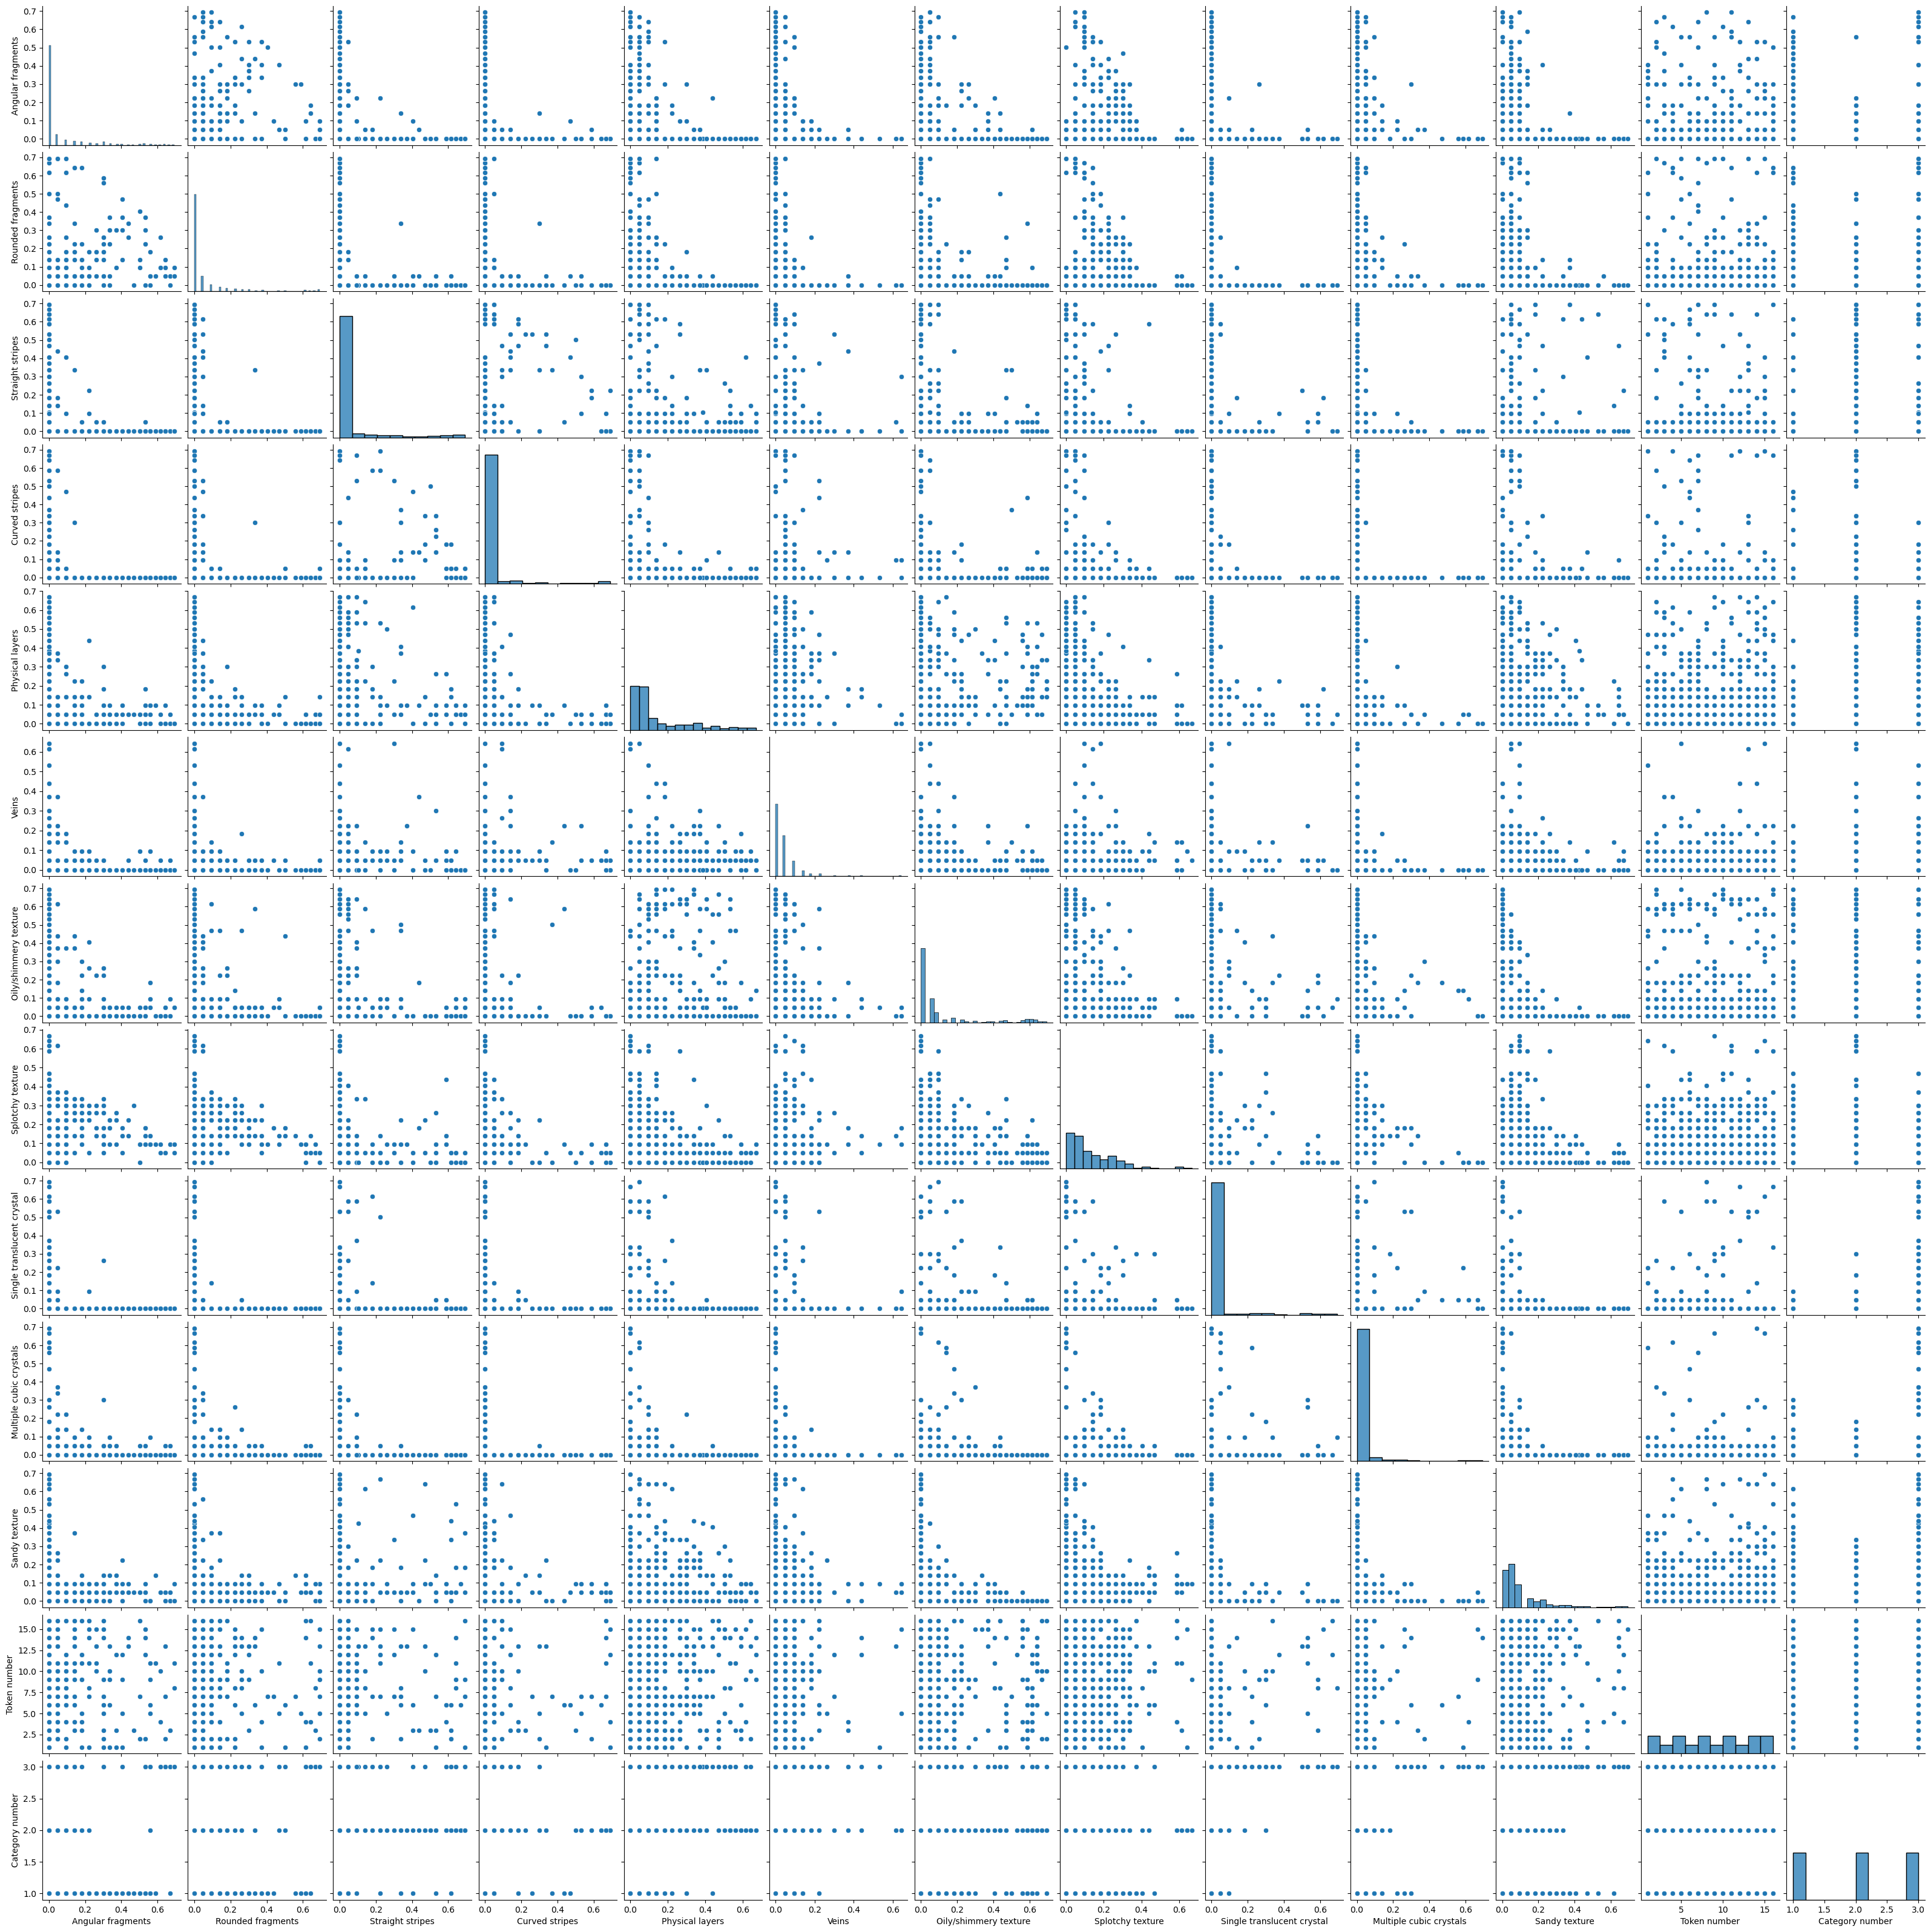

In [14]:

# Assuming the log-transformed data is already created in the previous steps

# Compute Pearson Correlation Coefficient (PCC) for the log-transformed data
correlation_matrix = log_transformed_data.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap for better readability
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Matrix (Log-Transformed Data)")
plt.show()

# Generate scatter plots for pairs of log-transformed attributes
# Use Seaborn pairplot for scatter matrix visualization
sns.pairplot(log_transformed_data)
plt.show()


From the PCC heatmap, we can make the following observations:

1. Strongest Positive Correlation:
Angular fragments and Rounded fragments (0.32): These two attributes have the highest positive correlation in the matrix, indicating that they tend to increase together. This suggests that when a sample has more Angular fragments, it also tends to have more Rounded fragments.
Physical layers and Category number (0.28): There is a moderate positive correlation between Physical layers and Category number, suggesting that the presence of more physical layers tends to be associated with certain categories.

Single translucent crystal and Category number (0.27): Similarly, Single translucent crystal is moderately positively correlated with Category number.

3. Strongest Negative Correlation:
Oily/shimmery texture and Sandy texture (-0.36): This is the most negative correlation in the dataset. It suggests that samples with high Oily/shimmery texture tend to have lower Sandy texture and vice versa. These two textures may represent opposite characteristics in the samples.

Splotchy texture and Physical layers (-0.32): This indicates that as Splotchy texture increases, Physical layers tend to decrease. There may be some inverse relationship between these two characteristics in the data.

5. Weak or No Correlation:
Many of the correlations are close to zero, indicating that there is little or no linear relationship between those pairs of attributes. For example:
Multiple cubic crystals and Curved stripes (-0.066): This indicates almost no correlation between these two attributes.

Veins and Physical layers (0.093): This shows a weak positive correlation, indicating little linear relationship.

Attributes like Token number show almost no correlation with other features, indicating they might be irrelevant for predictive models or analysis.

7. Category Number:
Category number is positively correlated with attributes like Physical layers (0.28) and Single translucent crystal (0.27), suggesting that these features may be indicative of certain categories.
However, the correlations are not very strong, indicating that while these attributes are related to category, they are not the sole defining features.

**3.For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).**

In [17]:
print(type(rock_df['Token number']))
train_data = log_transformed_data[log_transformed_data['Token number'] <= 10]
val_data = log_transformed_data[(log_transformed_data['Token number'] >= 11) & (log_transformed_data['Token number'] <= 13)]
test_data = log_transformed_data[log_transformed_data['Token number'] >= 14]

# Features and labels for each split
X_train = train_data.drop(columns=['Category number', 'Token number'])
y_train = train_data['Category number']

X_val = val_data.drop(columns=['Category number', 'Token number'])
y_val = val_data['Category number']

X_test = test_data.drop(columns=['Category number', 'Token number'])
y_test = test_data['Category number']

# Standardize the feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.series.Series'>


**4A.Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 3: Define the Logistic Regression model (Multinomial Logistic Regression)
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Step 4: Set up hyperparameters to explore using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Solvers for multi-class logistic regression
    'max_iter': [100, 200, 500, 1000]  # Number of iterations
}

# Step 5: Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Step 7: Evaluate performance on training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Step 8: Evaluate performance on validation data
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Step 9: Evaluate performance on testing data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Step 10: Display performance results
print(f"\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print(f"\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))

print(f"\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}

Training Performance:
Accuracy: 0.6733, Precision: 0.6753, Recall: 0.6733, F1-Score: 0.6738

Classification Report on Training Data:
              precision    recall  f1-score   support

           1       0.72      0.67      0.69       100
           2       0.64      0.68      0.66       100
           3       0.67      0.67      0.67       100

    accuracy                           0.67       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.68      0.67      0.67       300


Validation Performance:
Accuracy: 0.7556, Precision: 0.7620, Recall: 0.7556, F1-Score: 0.7490

Classification Report on Validation Data:
              precision    recall  f1-score   support

           1       0.80      0.93      0.86        30
           2       0.68      0.77      0.72        30
           3       0.81      0.57      0.67        30

**Impact of Hyperparameters**

- C (Inverse of regularization strength):
     * Values tested are 0.01, 0.1, 1, 10, and 100.
     * The best-performing value was found when C is 100, indicating that the model benefited from less regularization and required more flexibility to capture patterns in the dataset effectively.

- max_iter:
  * The best value of 100 suggests that the model converges relatively quickly.
  * This could indicate that the problem is not extremely complex or that the chosen solver (lbfgs) is efficient for this dataset.

- solver (Algorithm to use in the optimization problem):
The 'lbfgs' solver was selected, which is generally efficient for smaller datasets.
This solver uses an approximation to the Hessian matrix to steer its search through parameter space, often leading to faster convergence.

**4B.Support Vector Machine**

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 3: Define the Support Vector Classifier (SVC)
svm = SVC()

# Step 4: Set up the hyperparameter grid to explore
param_grid = {
    'C': [0.1, 1, 10, 100],                   # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],       # Kernel type
    'degree': [2, 3, 4],                      # Degree for polynomial kernel (only used when kernel='poly')
    'gamma': ['scale', 'auto']                # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Step 5: Use GridSearchCV for hyperparameter tuning (using 5-fold cross-validation)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Step 7: Evaluate the performance on training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Step 8: Evaluate the performance on validation data
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Step 9: Evaluate the performance on testing data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Step 10: Display performance results
print(f"\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print(f"\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))

print(f"\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

Training Performance:
Accuracy: 0.8267, Precision: 0.8349, Recall: 0.8267, F1-Score: 0.8250

Classification Report on Training Data:
              precision    recall  f1-score   support

           1       0.77      0.95      0.85       100
           2       0.87      0.73      0.79       100
           3       0.87      0.80      0.83       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300


Validation Performance:
Accuracy: 0.7667, Precision: 0.7621, Recall: 0.7667, F1-Score: 0.7605

Classification Report on Validation Data:
              precision    recall  f1-score   support

           1       0.81      0.97      0.88        30
           2       0.73      0.63      0.68        30
           3       0.75      0.70      0.

**Impact of Hyperparameters**

- C (Regularization parameter):  
     * The best value of 10 indicates a moderate regularization strength.
     * This suggests a balance between fitting the training data and maintaining model generalization.
- Kernel:
     * The polynomial kernel was selected which can be used for non-linear data.
- Degree:
     * A degree of 3 for the polynomial kernel suggests that the model benefits from capturing higher-order interactions between features.
     * This complexity helps in fitting the training data but may contribute to overfitting.
- Gamma:
     * The 'scale' option was chosen.
     * This adaptive approach to setting gamma can help in handling different scales of input features.

**4C.Random Forest classifier**

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 75}


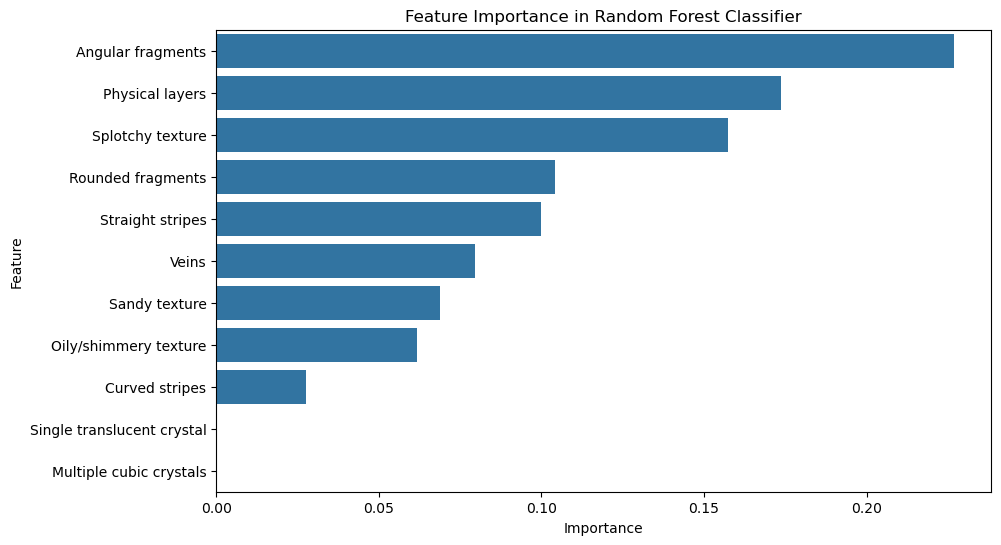


Training Performance:
Accuracy: 0.6100, Precision: 0.6105, Recall: 0.6100, F1-Score: 0.6103

Classification Report on Training Data:
              precision    recall  f1-score   support

           1       0.62      0.62      0.62       100
           2       0.69      0.68      0.68       100
           3       0.52      0.53      0.53       100

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300


Validation Performance:
Accuracy: 0.5556, Precision: 0.5554, Recall: 0.5556, F1-Score: 0.5521

Classification Report on Validation Data:
              precision    recall  f1-score   support

           1       0.58      0.70      0.64        30
           2       0.60      0.50      0.55        30
           3       0.48      0.47      0.47        30

    accuracy                           0.56        90
   macro avg       0.56      0.56      0.55        90
weighted avg       0.

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 3: Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Step 4: Set up the hyperparameter grid to explore
param_grid = {
    'n_estimators': [50, 75, 300],
    'max_depth': [2, 7, 9, 200],
    'min_samples_split': [10, 15, 20, 80],
    'min_samples_leaf': [10, 20, 30]
}
# Step 5: Use GridSearchCV for hyperparameter tuning (using 5-fold cross-validation)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

feature_importances = best_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

# Step 7: Evaluate the performance on training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Step 8: Evaluate the performance on validation data
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Step 9: Evaluate the performance on testing data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Step 10: Display performance results
print(f"\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print(f"\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))

print(f"\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_test_pred))


**IMPACT OF HYPERPARAMETER**
- Number of Estimators (n_estimators)
The optimal value of 300 trees suggests that the model benefits from a large ensemble. This helps in reducing variance and improving generalization. The high number of trees likely contributes to the model's stability across different datasets.

- Maximum Depth (max_depth)
A max_depth of 7 indicates that the model performs best with moderately deep trees. This depth allows the model to capture complex patterns without overfitting. It's a good balance between model complexity and generalization.

- Minimum Samples Split (min_samples_split)
The value of 10 for min_samples_split means that a node will only be split if it contains at least 10 samples. This relatively low value allows for more granular splits, potentially capturing finer details in the data.

Minimum Samples Leaf (min_samples_leaf)
With min_samples_leaf set to 20, each leaf node must contain at least 20 samples. This higher value helps prevent overfitting by ensuring that leaf nodes represent a significant portion of the data, not just noise or outliers.

**MODEL PERFORMANCE**
- The model's performance with respect to train, val and test set are 0.59, 0.58 and 0.60 respectively.
- Class 1 and 2 a performed well with the model than Class 3.

**5.Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.**

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

log_reg = LogisticRegression(C= 1, max_iter= 100, solver = 'newton-cg', random_state=42)
svm = SVC(C = 100, degree = 3, gamma = 'scale', kernel = 'poly',probability=True, random_state=42)
rf_clf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 10, min_samples_split=10, n_estimators =  100, random_state=42)

# Step 4: Combine classifiers using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('log_reg', log_reg), ('svm', svm), ('rf_clf', rf_clf)],
    voting='soft'  # Use soft voting to average probabilities
)

# Step 5: Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Step 6: Evaluate the performance on training data
y_train_pred = ensemble_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Step 7: Evaluate the performance on validation data
y_val_pred = ensemble_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Step 8: Evaluate the performance on testing data
y_test_pred = ensemble_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Step 9: Display performance results
print(f"\nTraining Performance of Ensemble:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print(f"\nValidation Performance of Ensemble:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_val_pred))

print(f"\nTesting Performance of Ensemble:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_test_pred))


Training Performance of Ensemble:
Accuracy: 0.7933, Precision: 0.7959, Recall: 0.7933, F1-Score: 0.7931

Classification Report on Training Data:
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       100
           2       0.75      0.79      0.77       100
           3       0.84      0.74      0.79       100

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300


Validation Performance of Ensemble:
Accuracy: 0.7000, Precision: 0.6932, Recall: 0.7000, F1-Score: 0.6941

Classification Report on Validation Data:
              precision    recall  f1-score   support

           1       0.77      0.90      0.83        30
           2       0.63      0.57      0.60        30
           3       0.68      0.63      0.66        30

    accuracy                           0.70        90
   macro avg       0.69      0.70      0.69        

The Voting Classifier ensemble performs the best, followed closely by Logistic Regression, then SVM, and finally Random Forest.

**6.Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does the human accuracy compare to the accuracy of your best model? [2 points] Compute the average human accuracy and standard deviation for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. Color rocks from three different categories in different colors. [2 points] Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant?**

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the data
human_data = pd.read_csv(r'C:\Users\charu\Downloads\trialData.csv')  # Replace with the correct path
rock_data = pd.read_csv(r'C:\Users\charu\Downloads\rock_df.csv')     # Replace with the correct path

# Filter for rocks with numbers 1 to 480
human_data = human_data[human_data['rocknumber'].between(1, 480)]


train_data = human_data[human_data['block'].isin([1, 2, 3])]
test_data = human_data[human_data['block'] == 4]

train_human_accuracy = train_data['cat_correct'].mean()
test_human_accuracy = test_data['cat_correct'].mean()
print("Human Accuracy - Train:", train_human_accuracy)
print("Human Accuracy - Test:", test_human_accuracy)

Human Accuracy - Train: 0.5599349490660221
Human Accuracy - Test: 0.5984143924378716


**Compute human accuracy on train and test data**

In [120]:
# Filter for rocks with Token numbers 1 to 10 for training and 11 to 16 for testing in model data
X_train = rock_data[rock_data['Token number'].between(1, 10)].drop(["Category number", "Token number"], axis=1)
y_train = rock_data[rock_data['Token number'].between(1, 10)]['Category number']

X_test = rock_data[rock_data['Token number'].between(11, 16)].drop(["Category number", "Token number"], axis=1)
y_test = rock_data[rock_data['Token number'].between(11, 16)]['Category number']

# Model accuracy on train and test data
model_train_accuracy = ensemble_clf.score(X_train, y_train)
model_test_accuracy = ensemble_clf.score(X_test, y_test)
print("Model Accuracy - Train:", model_train_accuracy)
print("Model Accuracy - Test:", model_test_accuracy)

Model Accuracy - Train: 0.8
Model Accuracy - Test: 0.7


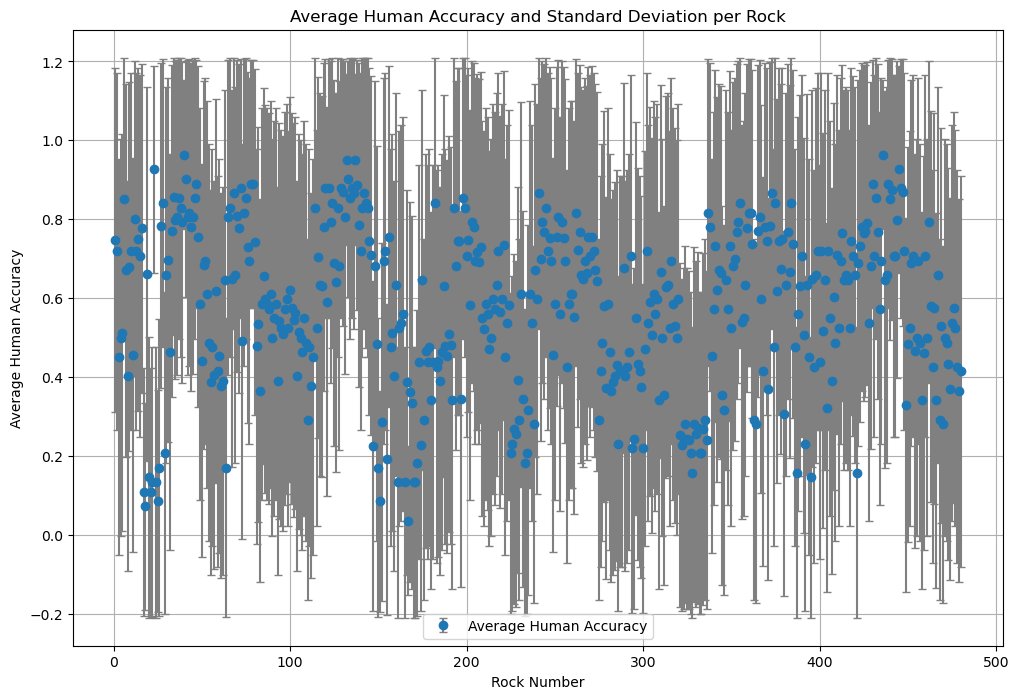

In [122]:
# 3. Compute Average Human Accuracy and Standard Deviation for Each of the 480 Rocks
human_rock_stats = human_data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).rename(columns={'mean': 'average_human_accuracy', 'std': 'std_human_accuracy'})

# Plot average human accuracy and standard deviation per rock
plt.figure(figsize=(12, 8))
plt.errorbar(human_rock_stats.index, human_rock_stats['average_human_accuracy'], 
             yerr=human_rock_stats['std_human_accuracy'], fmt='o', ecolor='gray', capsize=3, label='Average Human Accuracy')
plt.xlabel('Rock Number')
plt.ylabel('Average Human Accuracy')
plt.title('Average Human Accuracy and Standard Deviation per Rock')
plt.legend()
plt.grid(True)
plt.show()

In [124]:
# 4. Plot Average Human Accuracy vs Model Probability
# Assuming the model probabilities are based on predictions made for all 480 rocks

# Make predictions and calculate the probability of the predicted class
X_full = rock_data.drop(["Category number", "Token number"], axis=1)  # Adjust to keep only feature columns
model_probabilities = ensemble_clf.predict_proba(X_full).max(axis=1)  # Max probability for the predicted class

# Add model probabilities to rock_data
rock_data['model_probability'] = model_probabilities
rock_data['rocknumber'] = rock_data['Token number']  # Map token number to rock number

# Merge human accuracy with model probabilities
combined_stats = human_rock_stats.merge(rock_data[['rocknumber', 'Category number', 'model_probability']], 
                                        on='rocknumber', how='left')

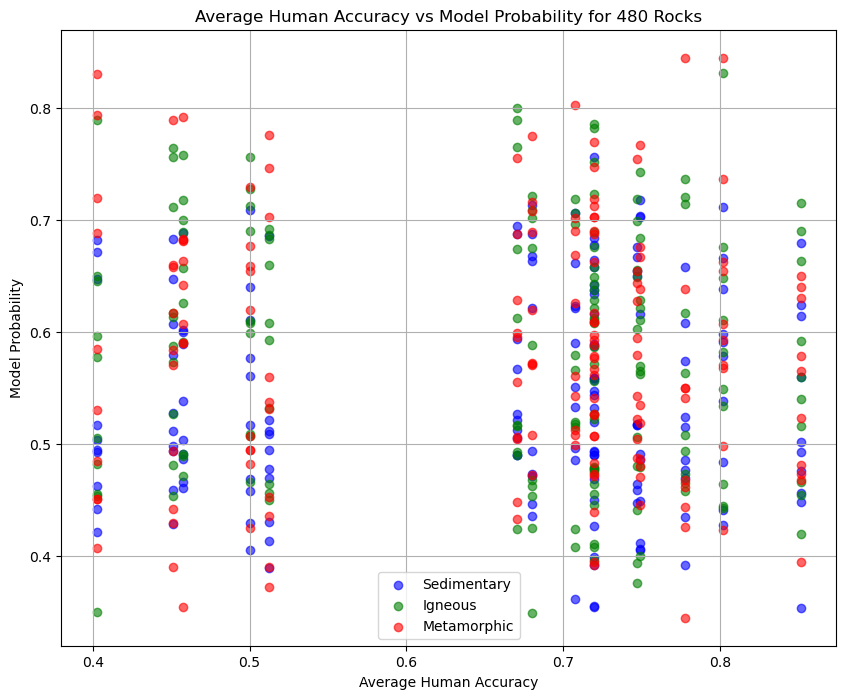

Sedimentary - Correlation: 0.04302716795010746, p-value: 0.5890326744776714
Igneous - Correlation: -0.08248282109838448, p-value: 0.29977225792409357
Metamorphic - Correlation: -0.04200092614867484, p-value: 0.5979564054966793
Overall - Correlation: -0.030418176181366448, p-value: 0.5061495520865529


In [126]:
# Define category colors
categories = {1: 'Sedimentary', 2: 'Igneous', 3: 'Metamorphic'}
colors = {'Sedimentary': 'blue', 'Igneous': 'green', 'Metamorphic': 'red'}
combined_stats['Category Name'] = combined_stats['Category number'].map(categories)

plt.figure(figsize=(10, 8))
for category in colors:
    category_data = combined_stats[combined_stats['Category Name'] == category]
    plt.scatter(category_data['average_human_accuracy'], category_data['model_probability'],
                label=category, color=colors[category], alpha=0.6)
plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.title('Average Human Accuracy vs Model Probability for 480 Rocks')
plt.legend()
plt.grid(True)
plt.show()

# 5. Drop rows with NaN values in either 'average_human_accuracy' or 'model_probability' before correlation
combined_stats_cleaned = combined_stats.dropna(subset=['average_human_accuracy', 'model_probability'])

# Compute Correlation Coefficients for Each Category and Overall
correlations = {}
for category in colors.keys():
    category_data = combined_stats_cleaned[combined_stats_cleaned['Category Name'] == category]
    if len(category_data) >= 2:  # Check if there are enough data points
        corr, p_value = pearsonr(category_data['average_human_accuracy'], category_data['model_probability'])
        correlations[category] = {'correlation': corr, 'p-value': p_value}
    else:
        correlations[category] = {'correlation': None, 'p-value': None}  # Not enough data

# Overall correlation across all rocks
if len(combined_stats_cleaned) >= 2:
    overall_corr, overall_p_value = pearsonr(combined_stats_cleaned['average_human_accuracy'], combined_stats_cleaned['model_probability'])
    correlations['Overall'] = {'correlation': overall_corr, 'p-value': overall_p_value}
else:
    correlations['Overall'] = {'correlation': None, 'p-value': None}  # Not enough data

# Display correlation results
for category, stats in correlations.items():
    if stats['correlation'] is not None:
        print(f"{category} - Correlation: {stats['correlation']}, p-value: {stats['p-value']}")
    else:
        print(f"{category} - Not enough data for correlation calculation.")

**CONCLUSION**

- The model performs significantly better than humans on the training and testing datasets, achieving higher accuracy on both sets. This suggests that the model has learned patterns in the data that allow it to classify rocks more accurately than humans.
- Human performance varies significantly across rocks, as indicated by the high variability (large error bars) in many cases plot 1. Some rocks have consistently high accuracy, while others are more challenging for humans, as indicated by lower average accuracy and larger deviations.
- The model outperforms human accuracy on the rock classification task and does not make similar errors as humans plot 2. The low correlation between human accuracy and model probability across rock categories further emphasizes that the model and human assessment differ in terms of confidence and difficulty for specific rocks.